# Pre-Processing

In [0]:
# Install the following libraries
# pandas
# librosa
# pysoundfile
# numpy
# IPython
# matplotlib

In [0]:
!pip install soundfile

In [0]:
# importing libraries

import numpy as np
import soundfile as sf 
from IPython.display import Audio
import matplotlib.pyplot as plt

import pandas as pd

import librosa
import librosa.display

In [0]:
# reading labels from
text = pd.read_csv('/content/labels.txt', sep=" ", header=None)
# give apropreate coumn name to the labels
text.columns = ["-", "clip", "-", "-", "label"]

In [0]:
text

,-,clip,-,-,label
0,LA_0094,LA_T_1037774,-,A05,spoof
1,LA_0083,LA_T_1070377,-,A02,spoof


In [0]:
!unzip sample.zip

Archive:  sample.zip
   creating: sample/
  inflating: sample/LA_T_1070377.flac  
  inflating: sample/LA_T_1037774.flac  


In [0]:
dir_path = '/content/sample/'

In [0]:
# path to first audio in the folder
sample_audio = "/content/sample/LA_T_1037774.flac"
# reading the audio file
clip, sample_rate = sf.read(sample_audio)
# play audio
Audio(clip, rate = sample_rate)

In [0]:
# Verify the audios are present in the corresponding folder

# path to first audio in the folder
sample_audio = dir_path+text["clip"][0]+".flac"
print(sample_audio)
# reading the audio file
clip, sample_rate = sf.read(sample_audio)
# play audio
Audio(clip, rate = sample_rate)

/content/sample/LA_T_1037774.flac


In [0]:
# function  to generate spectrogram and to seperate bonafide and spoofed audios 
#from the dataset according to their label
def save_spectogram(file_name,label):
    print(file_name)
    print(dir_path+file_name+".flac")
    clip, sample_rate = sf.read(dir_path+file_name+".flac")
    # file_name = file_name.split('/')[1]
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = "/content/sample/"+label+"/"+file_name.replace('.flac','.png')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close('all')

In [0]:
# generating spectrograms and seperating spectrogrms according to label

for file in range(len(text["clip"])):
    save_spectogram(text["clip"][file],text["label"][file])

LA_T_1037774
/content/sample/LA_T_1037774.flac
LA_T_1070377
/content/sample/LA_T_1070377.flac


In [0]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [0]:
y, sr = librosa.load('/content/LA_T_1070377.flac')
S = librosa.feature.melspectrogram(y=y, sr=sr)

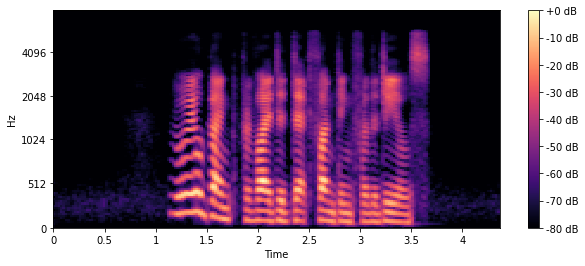

In [0]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
#plt.title('Mel spectrogram')
plt.savefig('melspectrogram', dpi=400, bbox_inches='tight',pad_inches=0)

In [0]:
plt.close('all')